## Life of a Salesman

In [1]:
import numpy as np
random_seed = 1729
np.random.seed(random_seed)
N=40
x=np.random.rand(N)
y=np.random.rand(N)

points = zip(x,y)
cities = list(points)
itinerary = list(range(0,N))

In [2]:
x

array([0.2121586 , 0.25901824, 0.42352188, 0.71966101, 0.69225093,
       0.72817482, 0.28754987, 0.25408333, 0.960929  , 0.56520661,
       0.06694703, 0.7333909 , 0.50978993, 0.2275736 , 0.34145108,
       0.51199318, 0.96072286, 0.61405442, 0.7524006 , 0.9003958 ,
       0.34713128, 0.65502532, 0.39706771, 0.12686022, 0.45782203,
       0.13562144, 0.1981645 , 0.31146771, 0.48521019, 0.44675218,
       0.73328889, 0.4580516 , 0.50325328, 0.04802375, 0.54475277,
       0.85807709, 0.44192641, 0.59568169, 0.48823568, 0.0614227 ])

In [2]:
lines = []
for j in range(0, len(itinerary)-1):
    lines.append([cities[itinerary[j]],cities[itinerary[j+1]]])
    

In [3]:
print(lines[:2])

[[(0.21215859519373315, 0.1421890509660515), (0.25901824052776146, 0.4415438502354807)], [(0.25901824052776146, 0.4415438502354807), (0.42352187994602863, 0.6384708617951832)]]


In [4]:
# generate a collection of lines between two cities
def genlines(cities, itinerary):
    lines = []
    for j in range(0, len(itinerary)-1):
        lines.append([cities[itinerary[j]],cities[itinerary[j+1]]])
    return(lines)

In [5]:
import math
def howfar(lines):
    distance=0
    for j in range(0,len(lines)):
        distance += math.sqrt(abs(lines[j][1][0]-lines[j][0][0])**2 + \
                             abs(lines[j][1][1]-lines[j][0][1])**2)
    return distance    

In [6]:
totaldistance = howfar(genlines(cities,itinerary))
print(totaldistance)

16.808756356994223


In [7]:
import matplotlib.collections as mc
import matplotlib.pylab as pl

def plotitinerary(cities, itin, plottitle, thename):
    lc = mc.LineCollection(genlines(cities, itin), linewidth=2)
    flg, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.scatter(x,y)
    pl.title(plottitle)
    pl.xlabel("X Coordinate")
    pl.ylabel("Y Coordinate")
    #pl.close()
    pl.show()

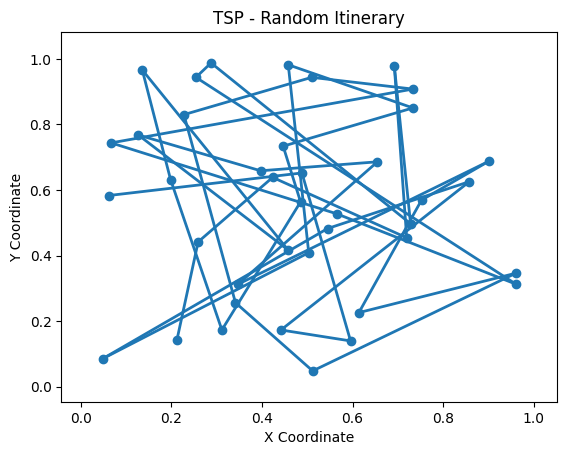

In [8]:
plotitinerary(cities, itinerary, "TSP - Random Itinerary", "figure2")

## Nearest Neighbors

In [9]:
# create function to determine the nearest neighbor of any city
def findnearest(cities, idx, nnitinerary):
    point = cities[idx]
    mindistance = float("inf")
    for j in range(0,len(cities)):
        distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1]-cities[j][1])**2)
        if distance < mindistance and distance > 0 and j not in nnitinerary:
            mindistance = distance
            minidx = j
    return(minidx)

In [10]:
# create function to iterate over all the cities
def donn(cities, N):
    nnitinerary = [0]
    for j in range(0, N-1):
        next = findnearest(cities, nnitinerary[len(nnitinerary)-1], nnitinerary)
        nnitinerary.append(next)
    return nnitinerary

## plot the nearest neighbor itinerary
plotitinerary(cities, donn(cities, N),"TSP = Nearest Neighbor","figure3")

In [11]:
print(howfar(genlines(cities,donn(cities,N))))

6.29000579854535


## Check for Further Improvements

In [12]:
def perturb(cities, itinerary):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    itinerary2[neighborids1]=itinerary[neighborids2]
    itinerary2[neighborids2]=itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    if(distance1 > distance2):
        itinerarytoreturn = itinerary2.copy()
        
    return(itinerarytoreturn.copy())

In [13]:
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,\
            20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
np.random.seed(random_seed)
itinerary_ps = itinerary.copy()
for n in range(0, len(itinerary)*50000):
    itinerary_ps = perturb(cities, itinerary_ps)
print(howfar(genlines(cities,itinerary_ps)))

7.37962855396978


## Temperature Function

In [14]:
temperature = lambda t: 1/(t+1)

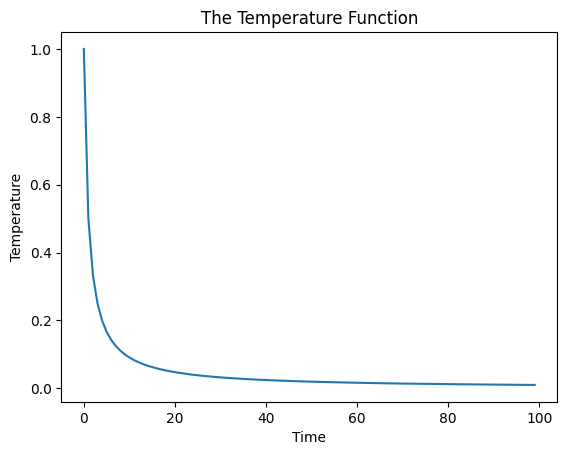

In [15]:
import matplotlib.pyplot as plt

ts = list(range(0,100))
plt.plot(ts, [temperature(t) for t in ts])
plt.title("The Temperature Function")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

## Simulated Annealing

In [16]:
def perturb_sa1(cities, itinerary, time):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    itinerary2[neighborids1]=itinerary[neighborids2]
    itinerary2[neighborids2]=itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    randomdraw = np.random.rand()
    temperature = 1/((time/1000)+1)
    
    if ((distance2 > distance1 and randomdraw < temperature) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()
        
    return(itinerarytoreturn.copy())

In [17]:
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,\
            20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
np.random.seed(random_seed)

itinerary_sa = itinerary.copy()
for n in range(0, len(itinerary)*50000):
    itinerary_sa = perturb_sa1(cities, itinerary_sa, n)

print(howfar(genlines(cities,itinerary))) # random itinerary
print(howfar(genlines(cities,itinerary_ps))) # perturb itinerary
print(howfar(genlines(cities,itinerary_sa))) # simulated annealing
print(howfar(genlines(cities,donn(cities,N)))) # nearest neighbors

16.808756356994223
7.37962855396978
5.924388797206357
6.29000579854535


## Tuning Perturb Function

In [18]:
def perturb_sa2(cities, itinerary, time):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1, neighborids2)
    if (randomdraw2 > 0.55):
        itinerary2[small:big] = itinerary2[small:big][::-1]
    elif (randomdraw2 < 0.45):
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand()*(len(itinerary)))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3 + j, tempitin[j])
    else:
        itinerary2[neighborids1]=itinerary[neighborids2]
        itinerary2[neighborids2]=itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    randomdraw = np.random.rand()
    temperature = 1/((time/1000)+1)
    
    if ((distance2 > distance1 and randomdraw < temperature) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()
        
    return(itinerarytoreturn.copy())

In [19]:
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,\
            20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
np.random.seed(random_seed)

itinerary_sa = itinerary.copy()
for n in range(0, len(itinerary)*50000):
    itinerary_sa = perturb_sa2(cities, itinerary_sa, n)

print(howfar(genlines(cities,itinerary_sa))) # simulated annealing

4.998258526417105


## Tuning Perturb Function Part 2

In [20]:
def perturb_sa3(cities, itinerary, time, maxitin):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    global mindistance
    global minitinerary
    global minidx
    
    itinerary2 = itinerary.copy()
    
    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1, neighborids2)
    if (randomdraw2 > 0.55):
        itinerary2[small:big] = itinerary2[small:big][::-1]
    elif (randomdraw2 < 0.45):
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand()*(len(itinerary)))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3 + j, tempitin[j])
    else:
        itinerary2[neighborids1]=itinerary[neighborids2]
        itinerary2[neighborids2]=itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    randomdraw = np.random.rand()
    temperature = 1/((time/1000)+1)
    
    if ((distance2 > distance1 and randomdraw < temperature) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()
    
    reset = True
    resetthresh = 0.04
    if (reset and (time - minidx) > (maxitin * resetthresh)):
        itinerarytoreturn = minitinerary
        minidx = time
    
    if(howfar(genlines(cities,itinerarytoreturn)) < mindistance):
        mindistance = howfar(genlines(cities,itinerary2))
        minitinerary = itinerarytoreturn
        minidx = time
    
    if(abs(time - maxitin) <= 1):
        itinerarytoreturn = minitinerary.copy()
    
    return(itinerarytoreturn.copy())

# Testing Performance

In [23]:
def siman(itinerary, cities):
    newitinerary = itinerary.copy()
    global mindistance
    global minitinerary
    global minidx
    mindistance = howfar(genlines(cities, itinerary))
    minitinerary = itinerary
    minidx = 0
    
    maxitin - len(itinerary) * 50000
    for t in range(0, maxitin):
        newitinerary = perturb_sa3(cities,newitinerary, t, maxitin)
    return(newitinerary.copy())

In [25]:
np.random.seed(random_seed)
itinerary = list(range(N))
nnitin = donn(cities,N)
nnresult = howfar(genlines(cities, nnitin))
simanitinerary = siman(itinerary,cities)
simanresult = howfar(genlines(cities,simanitinerary))
print(nnresult)
print(simanresult)
print(print(simanresult/nnresult))

6.29000579854535
4.642827129427408
0.7381276390080794
None


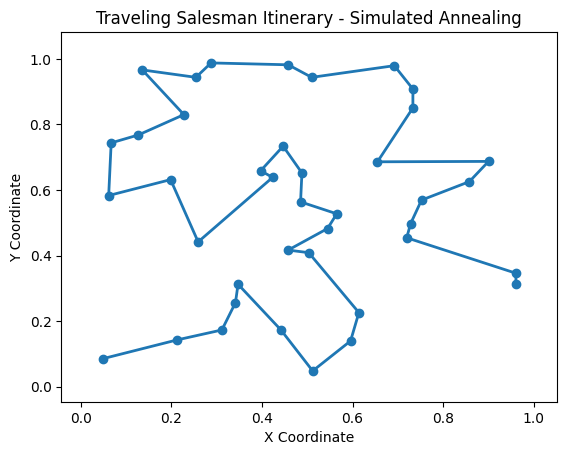

In [27]:
plotitinerary(cities, simanitinerary, "Traveling Salesman Itinerary - Simulated Annealing", "figure5")